In [1]:
import os, sys
import glob
import numpy as np
import netCDF4 as nc

import pandas as pd, xarray as xr

# ----------------------------
# set plotting styles
import colorcet as cc
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

rc = {"font.family": "serif", "mathtext.fontset": "stix", 'font.size': 16, 'axes.labelsize': 18}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
# TODO check sunglint component from OSOAA check OSOAA_SOS_CORE_harmel.F line 2181 or 3982

# ----------------------------

import coxmunk 

opj = os.path.join

## Statistics used in Cox and Munk model:
- `cm_iso`, original isotropic Cox Munk statistics
- `cm_dir`, historical values from directional COX MUNK
- `bh2006`, reassessment from Breon Henriot 2006 JGR

In [2]:
stats = 'cm_iso'

## Settings
- slope if True: output figure of wave slope values
- shadow if True: computation of the hiding and shadowing effects of wave heights

In [3]:

winds = [0.5,2,4,8,12,16]
wind_azi = 0

shadow = False
slope = False

sza = np.linspace(0, 88, 89)
vza = [30,40,50] #np.linspace(0, 80, 41)
azi = [45,90,135] #np.linspace(0, 360, 181)
Nwind,Nsza, Nvza, Nazi = len(winds), len(sza), len(vza), len(azi)
if slope:
    titles = ('$Z_{up}$', '$Z_{cr}$', '$R_f$','Pdist')
    N = 4
else:
    titles = ('I', 'Q', 'U')
    N=4
data = np.zeros((Nwind,Nsza,Nazi, Nvza, N))
for iwind, wind in enumerate(winds):
    for isza,sza_ in enumerate(sza):
        for i in range(Nvza):
            for j in range(Nazi):
                data[iwind,isza,j, i, :] = coxmunk.sunglint(sza_,vza[i],azi[j], m=1.334).sunglint(
                    wind, wind_azi, stats=stats, shadow=shadow, slope=slope)

In [4]:
data[np.abs(data)<1e-5]=0

In [5]:
Rsunglint = xr.Dataset(dict(L_Rsunglint=(["wind","sza","azi", "vza"], data[...,0]),
               Q_Rsunglint=(["wind","sza","azi", "vza"], data[...,1]),
               U_Rsunglint=(["wind","sza","azi", "vza"], data[...,2]),),
                                      coords=dict(
                                          vza=vza,
                                          azi=azi,
                                          sza=sza,
                                          wind=winds,
                                          stats=stats),
                                      attrs=dict(
                                          description="sunglint reflectance",
                                          units=""))

In [7]:
ofile='/DATA/git/vrtc/RTxploitation/case_study/rho_factor/data/sunglint_coxmunk_iso.nc'
Rsunglint.to_netcdf(ofile)

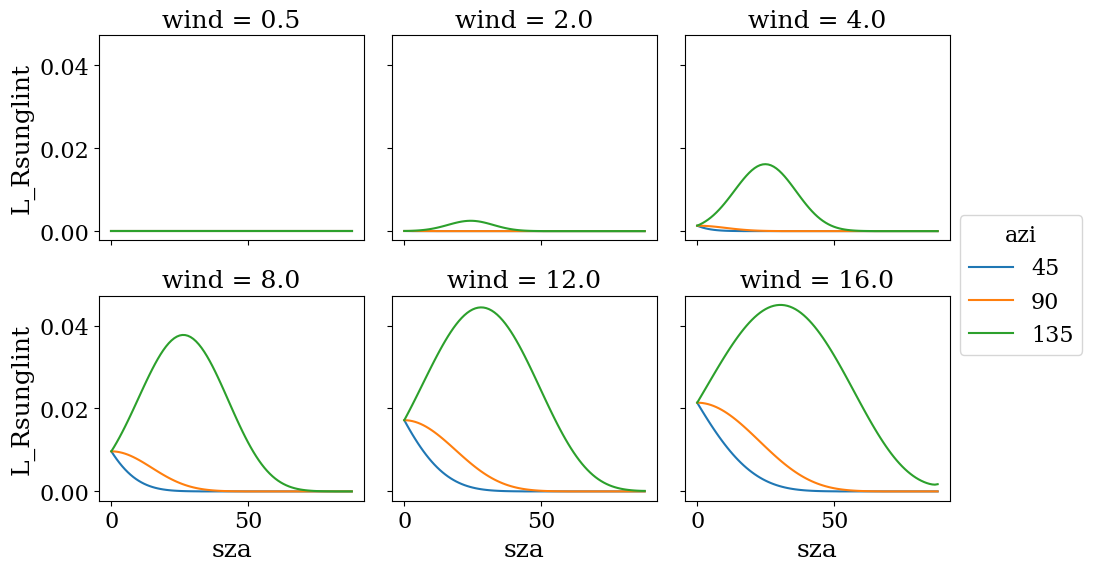

In [9]:
Rsunglint.L_Rsunglint.sel(wind=slice(0,16),vza=40).plot(col="wind",hue="azi",col_wrap=3)

## Full LUT


In [8]:

winds = [0.5,2,4,8,12,16]
wind_azi = 0

shadow = False
slope = False

sza = [10,30,50,70]
vza = np.linspace(0, 80, 41)
azi = np.linspace(0, 360, 181)
Nwind,Nsza, Nvza, Nazi = len(winds), len(sza), len(vza), len(azi)
if slope:
    titles = ('$Z_{up}$', '$Z_{cr}$', '$R_f$','Pdist')
    N = 4
else:
    titles = ('I', 'Q', 'U')
    N=4
data = np.zeros((Nwind,Nsza,Nazi, Nvza, N))
for iwind, wind in enumerate(winds):
    for isza,sza_ in enumerate(sza):
        for i in range(Nvza):
            for j in range(Nazi):
                data[iwind,isza,j, i, :] = coxmunk.sunglint(sza_,vza[i],azi[j], m=1.334).sunglint(
                    wind, wind_azi, stats=stats, shadow=shadow, slope=slope)

data[np.abs(data)<1e-5]=0

Rsunglint = xr.Dataset(dict(L_Rsunglint=(["wind","sza","azi", "vza"], data[...,0]),
               Q_Rsunglint=(["wind","sza","azi", "vza"], data[...,1]),
               U_Rsunglint=(["wind","sza","azi", "vza"], data[...,2]),),
                                      coords=dict(
                                          vza=vza,
                                          azi=azi,
                                          sza=sza,
                                          wind=winds,
                                          stats=stats),
                                      attrs=dict(
                                          description="sunglint reflectance",
                                          units=""))

ofile='/DATA/git/vrtc/RTxploitation/case_study/rho_factor/data/full_sunglint_coxmunk_iso.nc'
Rsunglint.to_netcdf(ofile)

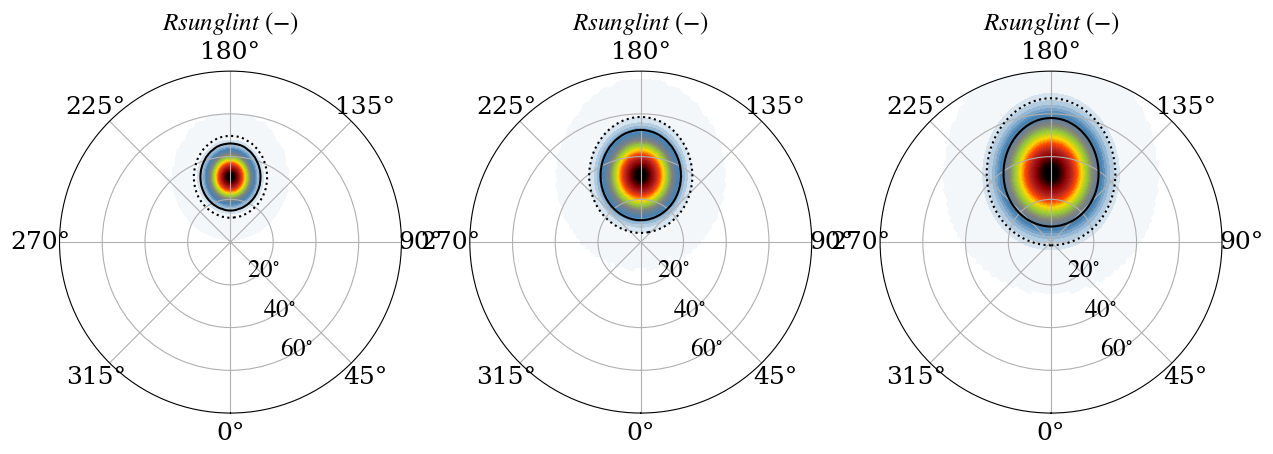

In [20]:
# ------------------
# plotting section
# ------------------
Rdata= Rsunglint.L_Rsunglint.sel(sza=30)
winds= [0.5,2,4]
cmap = mpl.colors.LinearSegmentedColormap.from_list("",
                                                    ['white','steelblue','grey','yellowgreen', "gold",
                                                     'orangered', "firebrick", 'darkred','black'])
fig, axs = plt.subplots(nrows=1, ncols=3, subplot_kw=dict(projection='polar'), figsize=(15, 5))
#axs = axs.ravel()

title='$Rsunglint\ (-)$'
for ii,wind in enumerate(winds):
    coxmunk.plot().add_polplot(axs[ii], vza, azi, Rdata.sel(wind=wind).values.T, title=title, cmap=cmap,scale=False)
    axs[ii].contour(np.radians(azi),vza, Rdata.sel(wind=wind).values.T, [0.01,0.05],colors='black',linestyles=[':','-'])


In [21]:

winds = [0.5,2,4,8,12,16]
wind_azi = 0

shadow = False
slope = False

sza = np.linspace(0, 80, 41)
       
vza = [30,40,50]
azi = np.linspace(0, 360, 181)
Nwind,Nsza, Nvza, Nazi = len(winds), len(sza), len(vza), len(azi)
if slope:
    titles = ('$Z_{up}$', '$Z_{cr}$', '$R_f$','Pdist')
    N = 4
else:
    titles = ('I', 'Q', 'U')
    N=4
data = np.zeros((Nwind,Nsza,Nazi, Nvza, N))
for iwind, wind in enumerate(winds):
    for isza,sza_ in enumerate(sza):
        for i in range(Nvza):
            for j in range(Nazi):
                data[iwind,isza,j, i, :] = coxmunk.sunglint(sza_,vza[i],azi[j], m=1.334).sunglint(
                    wind, wind_azi, stats=stats, shadow=shadow, slope=slope)

data[np.abs(data)<1e-5]=0

Rsunglint = xr.Dataset(dict(L_Rsunglint=(["wind","sza","azi", "vza"], data[...,0]),
               Q_Rsunglint=(["wind","sza","azi", "vza"], data[...,1]),
               U_Rsunglint=(["wind","sza","azi", "vza"], data[...,2]),),
                                      coords=dict(
                                          vza=vza,
                                          azi=azi,
                                          sza=sza,
                                          wind=winds,
                                          stats=stats),
                                      attrs=dict(
                                          description="sunglint reflectance",
                                          units=""))

ofile='/DATA/git/vrtc/RTxploitation/case_study/rho_factor/data/full_sza_sunglint_coxmunk_iso.nc'
Rsunglint.to_netcdf(ofile)

/home/harmel/anaconda3/envs/py10/lib/python3.10/site-packages/coxmunk/coxmunk.py:240: RuntimeWarning: invalid value encountered in arccos
  ang = np.arccos(ang)
